# Res1D - basic

In [1]:
import mikeio1d

## Res1D

In [2]:
# Check contents
res = mikeio1d.open("../data/network.res1d")
res.info()

Start time: 1994-08-07 16:35:00
End time: 1994-08-07 18:35:00
# Timesteps: 110
# Catchments: 0
# Nodes: 119
# Reaches: 118
# Globals: 0
0 - Water level (m)
1 - Discharge (m^3/s)

In [3]:
# Extract results to a pandas DataFrame
df = res.read()
df.head()

5 rows × 495 columns

### Reaches

In [4]:
# See info related to nodes
res.reaches

<ResultReaches> (118)
 
 Quantities (2) Water level (m) Discharge (m^3/s) Derived Quantities (6) ReachAbsoluteDischarge ReachFilling ReachFlooding ReachQQManning ReachWaterDepth ReachWaterLevelAboveCritical

In [5]:
# Get reach water levels
df_reaches = res.reaches.WaterLevel.read()
df_reaches.head()

5 rows × 247 columns

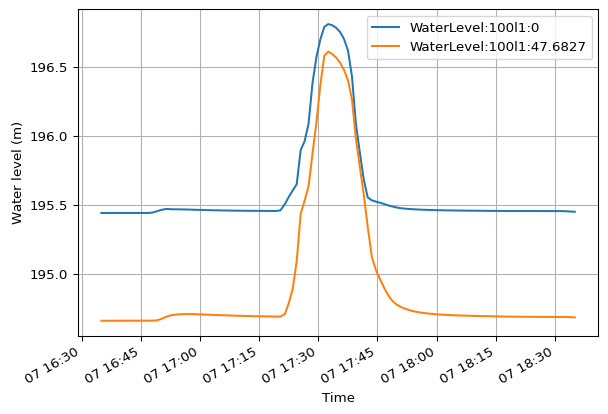

In [6]:
# Plot water levels for a specific reach
res.reaches['100l1'].WaterLevel.plot()

In [7]:
# See info related to a specific reach
res.reaches['100l1']

<Reach: 100l1>
 
 Attributes (9) name: 100l1 length: 47.6827148432828 start_chainage: 0.0 end_chainage: 47.6827148432828 n_gridpoints: 3 start_node: 100 end_node: 99 height: 0.30000001192092896 full_flow_discharge: 0.12058743359507902 Quantities (2) Water level (m) Discharge (m^3/s) Derived Quantities (6) ReachAbsoluteDischarge ReachFilling ReachFlooding ReachQQManning ReachWaterDepth ReachWaterLevelAboveCritical

### Grid points

In [8]:
# See grid point info for a reach by chainage
res.reaches['100l1']['47.683']

<ResultGridPoint>
 
 Attributes (5) reach_name: 100l1 chainage: 47.6827148432828 xcoord: -687907.999206543 ycoord: -1056412.0 bottom_level: 194.66000366210938 Quantities (1) Water level (m) Derived Quantities (0)

In [9]:
# Alternatively, index grid points by index number (e.g. '0' for first, '-1' for last, etc.).
res.reaches['100l1'][-1]

<ResultGridPoint>
 
 Attributes (5) reach_name: 100l1 chainage: 47.6827148432828 xcoord: -687907.999206543 ycoord: -1056412.0 bottom_level: 194.66000366210938 Quantities (1) Water level (m) Derived Quantities (0)

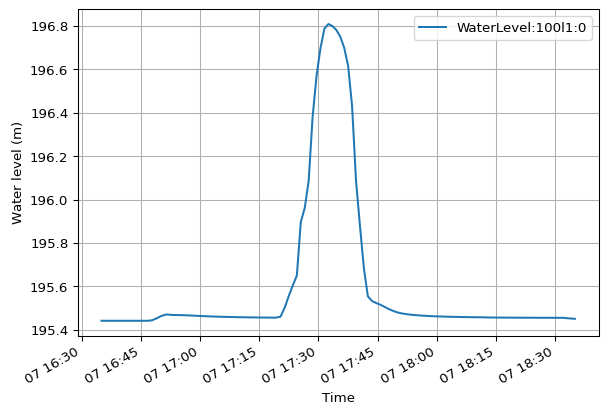

In [10]:
# Plot water level at a gridpoint
res.reaches['100l1'][0].WaterLevel.plot()

### Nodes

In [11]:
# See info related to nodes
res.nodes

<ResultNodes> (119)
 
 Quantities (1) Water level (m) Derived Quantities (3) NodeFlooding NodeWaterDepth NodeWaterLevelAboveCritical

In [12]:
# Get node water levels
df_nodes = res.nodes.WaterLevel.read()
df_nodes.head()

5 rows × 119 columns

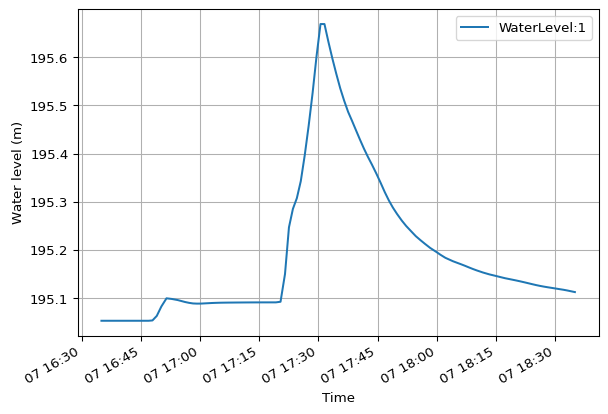

In [13]:
# Plot water level of specific node
res.nodes['1'].WaterLevel.plot()

In [14]:
# See info related to a specific node
res.nodes['1']

<Manhole: 1>
 
 Attributes (8) id: 1 type: Manhole xcoord: -687934.6000976562 ycoord: -1056500.69921875 ground_level: 197.07000732421875 bottom_level: 195.0500030517578 critical_level: inf diameter: 1.0 Quantities (1) Water level (m) Derived Quantities (3) NodeFlooding NodeWaterDepth NodeWaterLevelAboveCritical

### Catchments

In [15]:
# See info related to catchments
res = mikeio1d.open("../data/catchments.res1d")
res.catchments

<ResultCatchments> (31)
 
 Quantities (5) Total Runoff (m^3/s) Actual Rainfall (m/s) Zink, Load, RR (kg/s) Zink, Mass, Accumulated, RR (kg) Zink, RR (mg/l) Derived Quantities (0)

In [16]:
# Extract runoff to a pandas DataFrame
df = res.catchments.TotalRunOff.read()
df.head()

5 rows × 31 columns

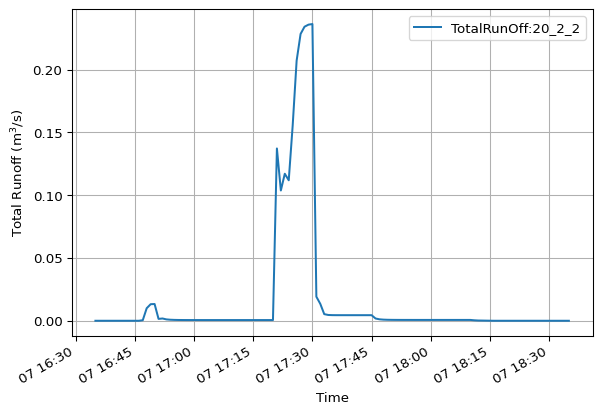

In [17]:
# Plot runoff for a specific catchment
df = res.catchments['20_2_2'].TotalRunOff.plot()

## Dynamic selections

In [18]:
# Dynamically select results to extract into a pandas DataFrame.
res = mikeio1d.open("../data/network.res1d")

res.reaches['100l1'].Discharge.add()
res.reaches['101l1'].Discharge.add()
res.nodes['1'].WaterLevel.add()
df = res.read()
df.head()